In [1]:
#importing all the libraries necessary to perform the required analysis and prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [2]:
#Reading the excel file
gold_data=pd.read_excel(r'D:\My projects\gold price/gld_price_data.xlsx')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-02-01 00:00:00,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-03-01 00:00:00,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-04-01 00:00:00,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-07-01 00:00:00,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-08-01 00:00:00,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#We are predicting the price of Gold by analysing the value of silved USD and SPX 
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,2018-08-05 00:00:00,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,2018-09-05 00:00:00,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,2018-10-05 00:00:00,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
#To find the null or missing values in the particular column
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
#to find out the number of rows and columns in the dataset
gold_data.shape

(2290, 6)

In [8]:
#Gives us the general information of the dataset for example: the non null values, Datatype of the particular column and count
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [31]:
#Dropping the Date column from the dataset
gold_data.drop(columns=['Date'],inplace=True)

In [32]:
#This is giving us the overall description of the data so as to analyse it well
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [35]:
#finding the correlation between the different features in the data
correlation_data=gold_data.corr(method='kendall')

<AxesSubplot:>

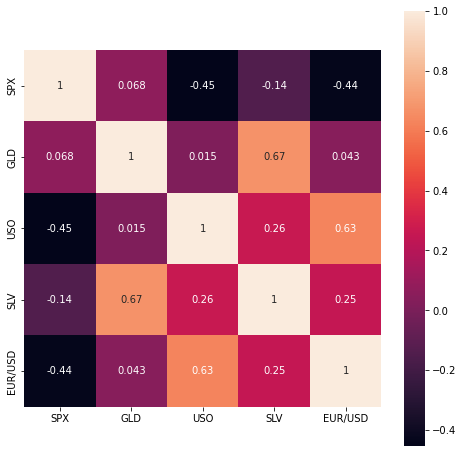

In [38]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation_data,cbar=True,square=True,annot=True)

In [39]:
#correlation values of gold
correlation_data['GLD']

SPX        0.068464
GLD        1.000000
USO        0.015412
SLV        0.674810
EUR/USD    0.042871
Name: GLD, dtype: float64

C:\Users\aditi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

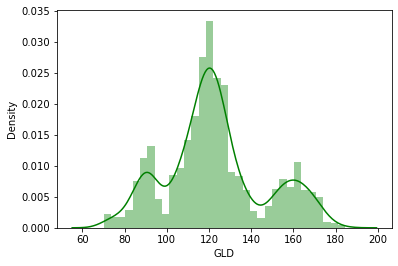

In [41]:
#checking the distribution of the gold price
sns.distplot(gold_data['GLD'],color='green')

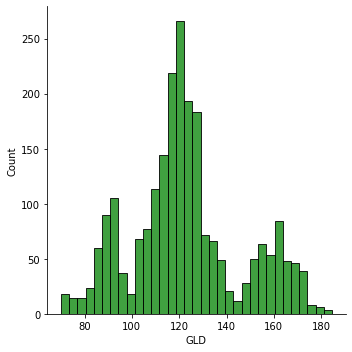

In [42]:
#as we can see from the figure most of the values lie in the range of 120
#this is a distribution plot
sns.displot(gold_data['GLD'],color='green')

In [43]:
#Splitting the data. Seperating the independent and the dependent features
X=gold_data.drop(['GLD'],axis=1)
Y=gold_data['GLD']

In [44]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [45]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [46]:
#splitting into training data and test data
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [47]:
#model training and for this we are using the random forest regressor
regressor=RandomForestRegressor(n_estimators=100)

In [50]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [51]:
#model evaluation. Prediction on the test data
test_data_prediction=regressor.predict(X_test)
test_data_prediction

array([168.48209934,  81.81729999, 116.03709991, 127.64520029,
       120.80190101, 154.65279801, 150.17429796, 126.07960023,
       117.47169875, 125.88040042, 116.81380064, 171.13070068,
       141.20669853, 168.00179939, 115.16590004, 117.8007005 ,
       139.45780304, 170.11410029, 159.65740245, 159.9888001 ,
       155.10719981, 125.37700022, 175.79340005, 156.94440358,
       125.24620048,  93.73969951,  77.69989996, 120.34810012,
       119.08729949, 167.50349962,  88.18080062, 125.49350042,
        90.98910026, 117.81709991, 121.06449925, 136.20580157,
       115.40140119, 115.16500065, 148.5837007 , 107.13780099,
       104.73690235,  87.13539792, 126.61340059, 118.11290022,
       153.79269948, 119.65160021, 108.27280018, 107.96679825,
        93.36150095, 127.07889779,  75.08090038, 113.54969878,
       121.11730025, 111.27239884, 118.84489903, 121.17899948,
       158.69080127, 167.55730149, 147.18519664,  86.02549853,
        94.30180039,  86.77999881,  90.60300045, 119.06

In [53]:
#R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error: ",error_score)
#when the values are the in the range of 100s and 1000s then the error value of 0.98 is very good


R squared error:  0.9897196681954578


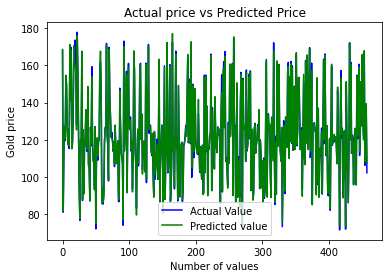

In [54]:
#compare the actual values and predicted values in a Plot
Y_test=list(Y_test)
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted value')
plt.title('Actual price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()

In [ ]:
#as we can see from the above graph the actual and the predicted values are fairly accurate.
